---

# COSC2753 | Machine Learning

## Week 2 Lab Exercises: Reading Data & Exploratory Data Analysis (EDA)

---

## Introduction

In this lab, we get some initial experience with using some of the main Python tools for this course, including Numpy, Matplotlib, and Pandas. We also load some datasets, compute some basic statistics on them and plot them.

The lab assumes that you are familiar with Python. Please complete `Week 01 Lab Exercises: Introduction to Python` before attempting this lab.

The lab can be executed on either your own machine (with anaconda installation) or lab computer.

### Objectives

- Continue to familiarize with Python and Jupiter Notebook.
- Load dataset and examine the dataset.
- Learn to compute basic statistics to understand the dataset more.
- Plot the datasets to visually investigate the dataset.

### Datasets

We examine two regression-based datasets in this lab. The first one is to do with house prices, some factors associated with the prices and trying to predict house prices. The second dataset is predicting the amount of share bikes hired everyday in Washington D.C., USA, based on time of the year, day of the week, and weather factors. These datasets are available in `house_price.csv` and `bike_hire.csv` in the code repository.

---

## Load Dataset to Python Notebook

Next we examine how to load these into Python and Jupyter Notebooks. We will first analyze the house price dataset, then you will repeat the process to analyze the bike hire dataset.

First, we need to import a few packages that will be used for our data loading and analyis. In Python Notebook, you can load packages just before it is called (no need to load them at the start of the program).

Pandas is a great Python package for loading data. We will use Matplotlib to visualize some of the distributions. Numpy is a numeric library that has many useful matrices and mathematical functionality.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
house_price_data = pd.read_csv("house_price.csv", delimiter=r"\s+")

Replace the filemame with the relative or absolute path to your files. We strongly encourage you to look up the documentation of the functions we use in the lab.

The `read_csv()` command loads the input file, which is a csv formatted file delimited by tabs into a **Pandas Dataframe** (which can be thought as a table). A dataframe can store the column names as well as the data. Examine what has been loaded into the dataframe `house_price_data`.

In [23]:
print(house_price_data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

If you are interested in checking only the first few rows of the dataframe to see if you have read the data correctly, you can use the `head()` method in the dataframe.

In [24]:
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Now we have loaded the data into a dataframe and printed it out, next we will compute some very basic statistic. The abbreviated column names:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: lower status of the population
- MEDV: Median value of owner-occupied homes in $1000's

**The target column is MEDV and all the other columns are attributes.**

Study the variables carefully and understand what they represent before moving to the next section.

---

## Exploratory Data Analysis (EDA)

Often the first step in developing a machine learning solution for a given dataset is the EDA. EDA refers to the critical process of performing initial investigations on data so as to:
- Maximize insight into a dataset
- Uncover underlying structure
- Extract important variables
- Detect outliers and anomalies
- Test underlying assumptions
- Develop parsimonious models
- Determine optimal factor settings

with the help of summary statistics and graphical representations. The particular graphical techniques employed in EDA are often quite simple, consisting of variuous techniques of:
- Plotting the raw data (such as data traces, histograms, bi-histograms, probability plots, lag plots, block plots, and Youden plots).
- Plotting simple statistics such as mean plots, standard deviation plots, box plots, and main effect plots of the raw data.
- Positioning such plots so as to maximize our natural pattern-regconition abilities, such as using multiple plots per page.

> **⚠️ Warning: EDA is a subjective process and will depend on the task and the data you have. There is no globally correct way of doing this.**
>
> Usually you need to have a good understanding of the task before deciding what EDA techniques to use and continiously refine them based on the observations you make in the intitial steps. Since we are still at the beginning of the course, let's explore some commonly used techniques. You will understand the significant of these methods and observations in terms of Machine Learning in the next couple of weeks.

Let's first see the shape of the dataframe.

In [25]:
house_price_data.shape

(506, 14)

❓ What does the above output tell you?

It is also a good practice to know the columns and their corresponding data types, along with finding whether they contain null values or not.

In [26]:
house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In pandas, any missing values in the data (your input CSV file) is represented as NaN.

❓ Are there any missing value in the dataset?

Next, let's compute some summary statistics of the data we have read.

In [27]:
pd.DataFrame.min(house_price_data)

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
MEDV         5.00000
dtype: float64

In [28]:
pd.DataFrame.max(house_price_data)

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
MEDV        50.0000
dtype: float64

In [29]:
pd.DataFrame.mean(house_price_data)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [30]:
pd.DataFrame.median(house_price_data)

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

The `describe()` function in pandas is very handy in getting various summary statisics. This function returns the count, mean, standard deviation, minimum and maximum values, and the quantiles of the data.

In [31]:
house_price_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Data comes in two priciple types in statistics, and it is crucial that we recognize the differences between these two types of data.

1. Categorical Variables: These are data points that take on a finite number of values, and whose values do not have a numerical interpretation.
- Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars.
- Nominal categorical variable cannot be put in any logical order. Examples of this would be the gender, race, ect.
2. Numerical Variables: These are variables which are numerical in nature.
- Continuous Variables: Take on a continuos values (no breaks). For example, height and weight.
- Discrete numerical variables take on a set of values which can be counted. For example, the number of rooms in a house.

❓ Try to identify what type of data is in the `house_price_data` dataframe.

❓ What is the type of data for CHAS and RAD?

❓ What insights did you get from the above output? Look closely at attributes `ZN` and `CHAS`, do you see a difference in those two compared to the others?

---

## Data Distribution

One of the most important step in EDA is estimating the distribution of a variable. Lets begin with histogram plot.

<Figure size 1600x1600 with 0 Axes>

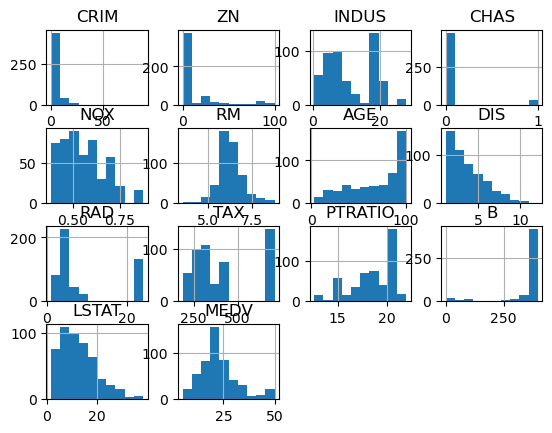

In [32]:
plt.figure(figsize=(20, 20), dpi=80)
house_price_data.hist()
plt.show()

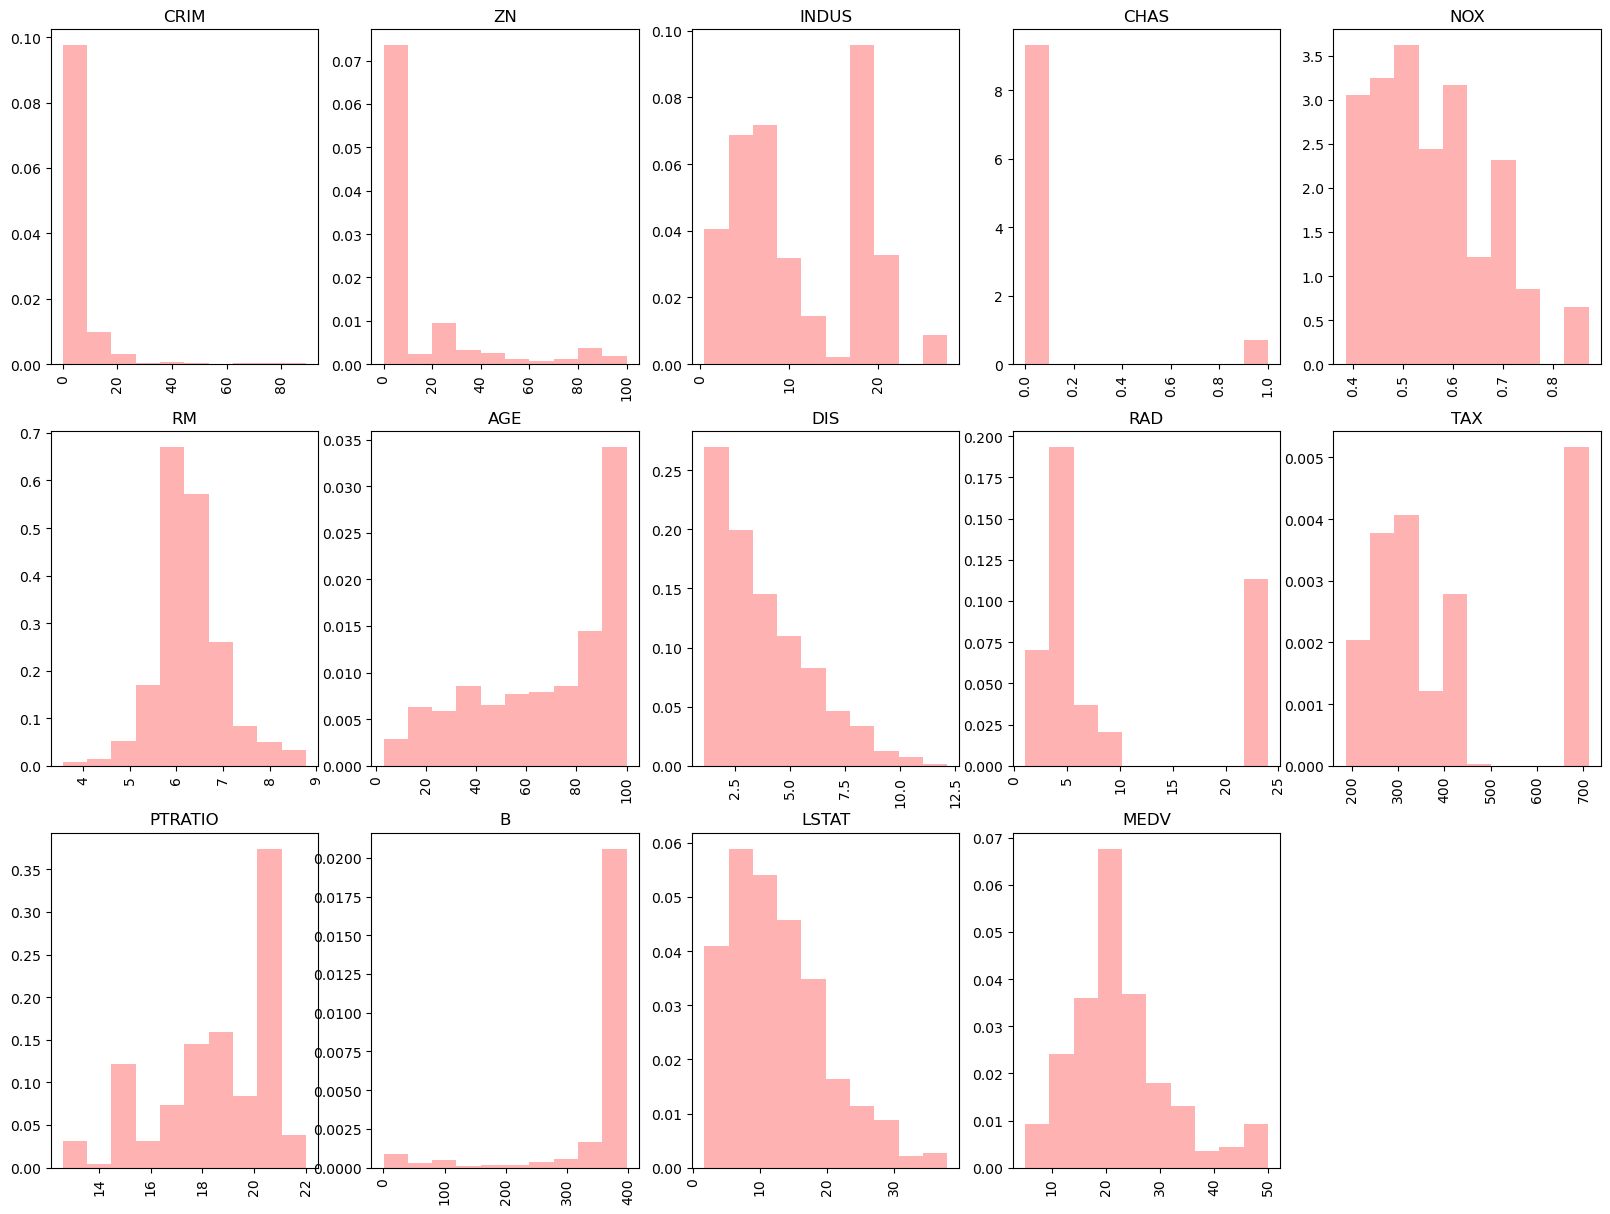

In [33]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(house_price_data.columns):
    plt.subplot(4, 5, i + 1)
    plt.hist(house_price_data[col], alpha=0.3, color="r", density=True)
    plt.title(col)
    plt.xticks(rotation="vertical")

> **⚠️ Warning: Always question the bin sizes** of a histogram to see whether they are appropriate for the plot being presented. If you see a histogram with illogically large or small bin size and/or uneven bin sizes, beware of the results being presented!

❓ What observations did you make?

✅ Observations:
- Attributes `CHAS` is a categorical variable. Most data instances are from class 0 and only a few instances are from class 1.
- Many attributes are heavily skewed. e.g. `CRIM`, `ZN`, `DIS`, `AGE`, `B`, etc.
- Attributes `RAD` and `TAX` has values that are far from the majority values. Further investigations are needed.
- Target variable MEDV is distributed around 22 with some extreme values around 50.
- ... 

Box plot is another useful tool in examining the data. Lets use a box plot to observe our data.

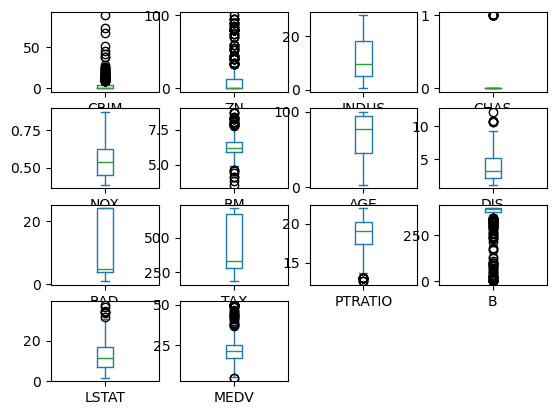

In [34]:
house_price_data.plot(kind="box", subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.show()

You can focus on only one variable. Lets use a box plot to observe our target variable `MEDV`.

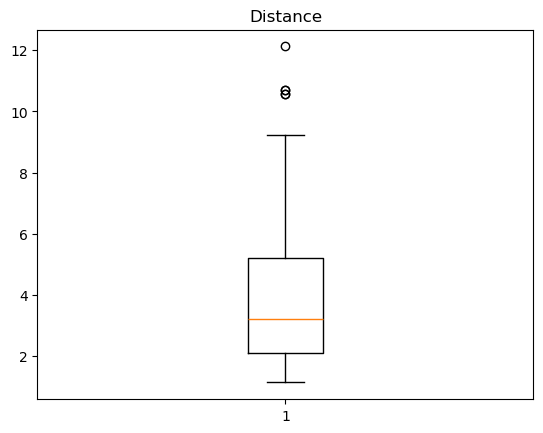

In [35]:
plt.boxplot(house_price_data["DIS"])
plt.title("Distance")
plt.show()

**How to read Box Plots:**
- The thick line in the middle of the box gives the median value.
- The top of the box shows Quantile 75%.
- The bottom of the box shows Quantile 25%.
- So the height of the box is the Inter Quantile Range (IQR).
- The top whisker -| shows Q0.75 + 1.5 * IQR, the upper cutoff for outliners using Turkey's rule.
- The bottom whisker -| shows Q0.25 - 1.5 * IQR, the lower cutoff for outliners using Turkey's rule.
- Any data points (circles) show outliner values.

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

❓ Are there any outliers in `house_price_data`?

---

## Relationship Between Variable

In the previous section, we observed each attribute (data column) independently. Sometimes it is also useful to observe the relationship between two variables. There are several techniques that we can use for this purpose. One of the key techniques is a scatter plot.

Since our task is to predict MEDV (target variable) using all other attributes, let's plot the relationship between MEDV and other columns.

For this we can use `Matplotlib`. However, there is another python package called `Seaborn` that plots nice looking figures. `Seaborn` is a python data visualization library based on `Matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.

Correlation is another important statistic when developing Machine Learning models. Lets plot the correlation matrix for the numerical data we have:

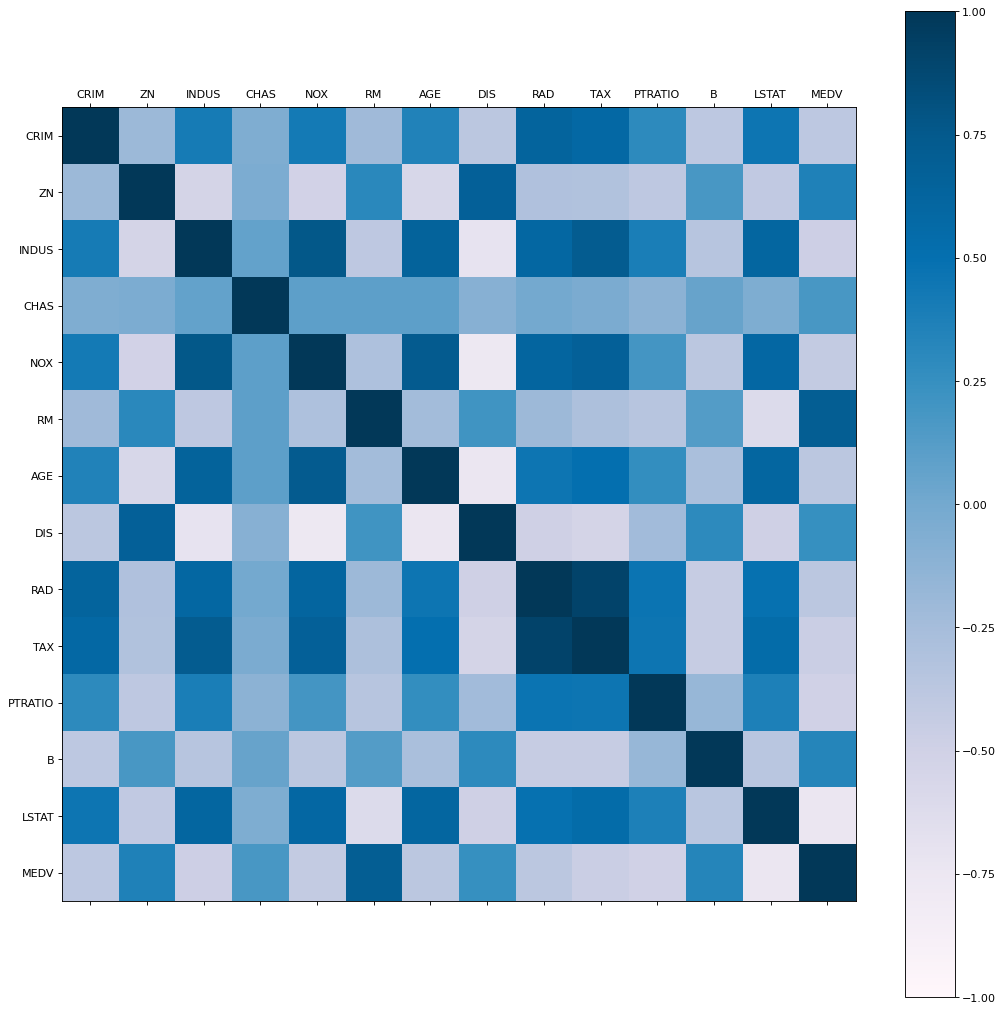

In [36]:
correlation = house_price_data.corr()
fig = plt.figure(figsize=(16, 16), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0, 14, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(house_price_data.columns)
ax.set_yticklabels(house_price_data.columns)
plt.show()

❓ What observations did you make?

> ✅ Observations:
>
> - There seems to be a good linear relationship between MEDV and RM.
> - The relationship between MEDV and some variables appears to be nonlinier (e.g. LSAT).
> - ...

If you want to use seaborn, you can try:

[Text(0.5, 0, 'CRIM'),
 Text(1.5, 0, 'ZN'),
 Text(2.5, 0, 'INDUS'),
 Text(3.5, 0, 'CHAS'),
 Text(4.5, 0, 'NOX'),
 Text(5.5, 0, 'RM'),
 Text(6.5, 0, 'AGE'),
 Text(7.5, 0, 'DIS'),
 Text(8.5, 0, 'RAD'),
 Text(9.5, 0, 'TAX'),
 Text(10.5, 0, 'PTRATIO'),
 Text(11.5, 0, 'B'),
 Text(12.5, 0, 'LSTAT'),
 Text(13.5, 0, 'MEDV')]

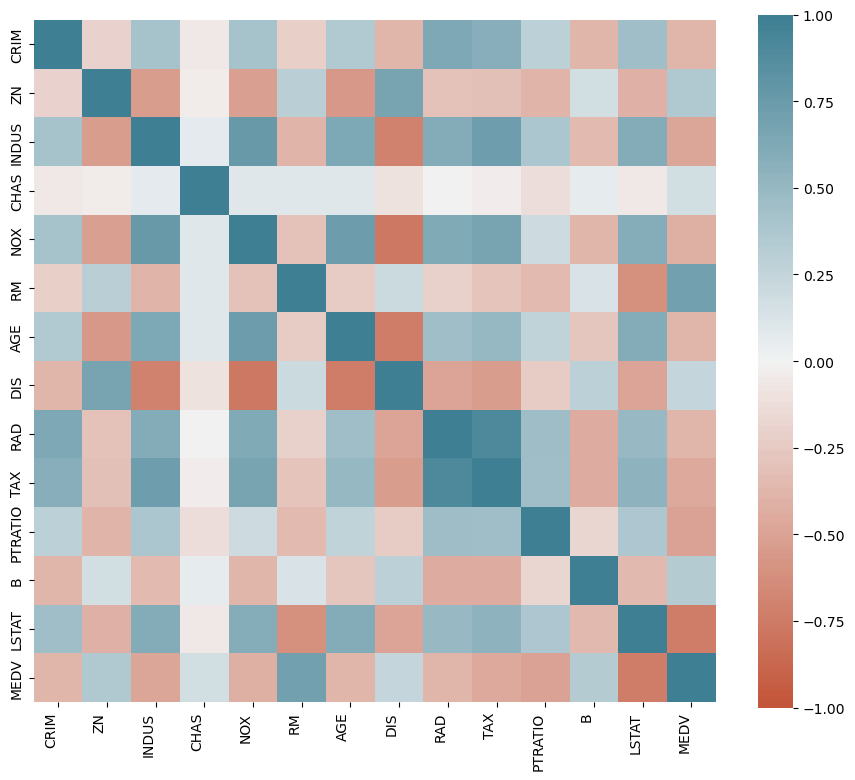

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
corr = house_price_data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment="right")

---

## Exercise: Analyze the Bike Hire Data

**✏️ Task: Analyze the Bike Hire Data**
Now you see how to do this task for the `house_price` dataset. Repeat the same process for the `bike_hire` dataset.

Answer the following questions and discuss this with your lab demonstrator. Please do attempt this, and don't wait to see if solutions are released (they will not be!).
- What is the range of some of the attributes?
- Which of the features have a very different average to the others?
- Which feature is skewed (hint: examine the histogram)?
- Which features are highly correlated?

Related above questions back to the domain of the dataset (bike_hire) and see if you can come up with explanations for the observed data.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
bike_hire_data = pd.read_csv("bike_hire.csv", delimiter=r",")

In [42]:
print(bike_hire_data)

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

In [43]:
bike_hire_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
bike_hire_data.shape

(731, 16)

In [45]:
bike_hire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
pd.DataFrame.min(bike_hire_data)

instant                1
dteday        2011-01-01
season                 1
yr                     0
mnth                   1
holiday                0
weekday                0
workingday             0
weathersit             1
temp             0.05913
atemp            0.07907
hum                  0.0
windspeed       0.022392
casual                 2
registered            20
cnt                   22
dtype: object

In [47]:
pd.DataFrame.max(bike_hire_data)

instant              731
dteday        2012-12-31
season                 4
yr                     1
mnth                  12
holiday                1
weekday                6
workingday             1
weathersit             3
temp            0.861667
atemp           0.840896
hum               0.9725
windspeed       0.507463
casual              3410
registered          6946
cnt                 8714
dtype: object

In [50]:
pd.DataFrame.mean(bike_hire_data, numeric_only=True)

instant        366.000000
season           2.496580
yr               0.500684
mnth             6.519836
holiday          0.028728
weekday          2.997264
workingday       0.683995
weathersit       1.395349
temp             0.495385
atemp            0.474354
hum              0.627894
windspeed        0.190486
casual         848.176471
registered    3656.172367
cnt           4504.348837
dtype: float64

In [51]:
pd.DataFrame.median(bike_hire_data, numeric_only=True)

instant        366.000000
season           3.000000
yr               1.000000
mnth             7.000000
holiday          0.000000
weekday          3.000000
workingday       1.000000
weathersit       1.000000
temp             0.498333
atemp            0.486733
hum              0.626667
windspeed        0.180975
casual         713.000000
registered    3662.000000
cnt           4548.000000
dtype: float64

In [53]:
bike_hire_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


<Figure size 1600x1600 with 0 Axes>

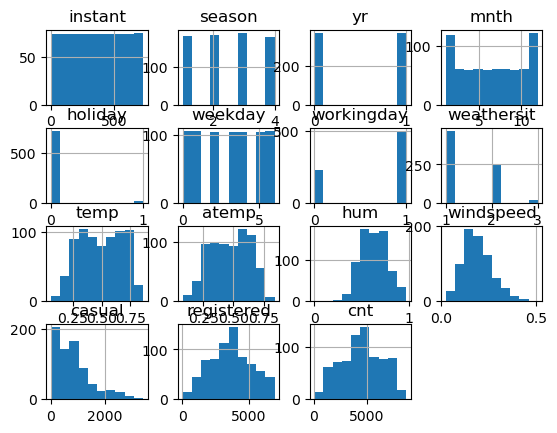

In [ ]:
plt.figure(figsize=(20, 20), dpi=80)
bike_hire_data.hist()
plt.show()

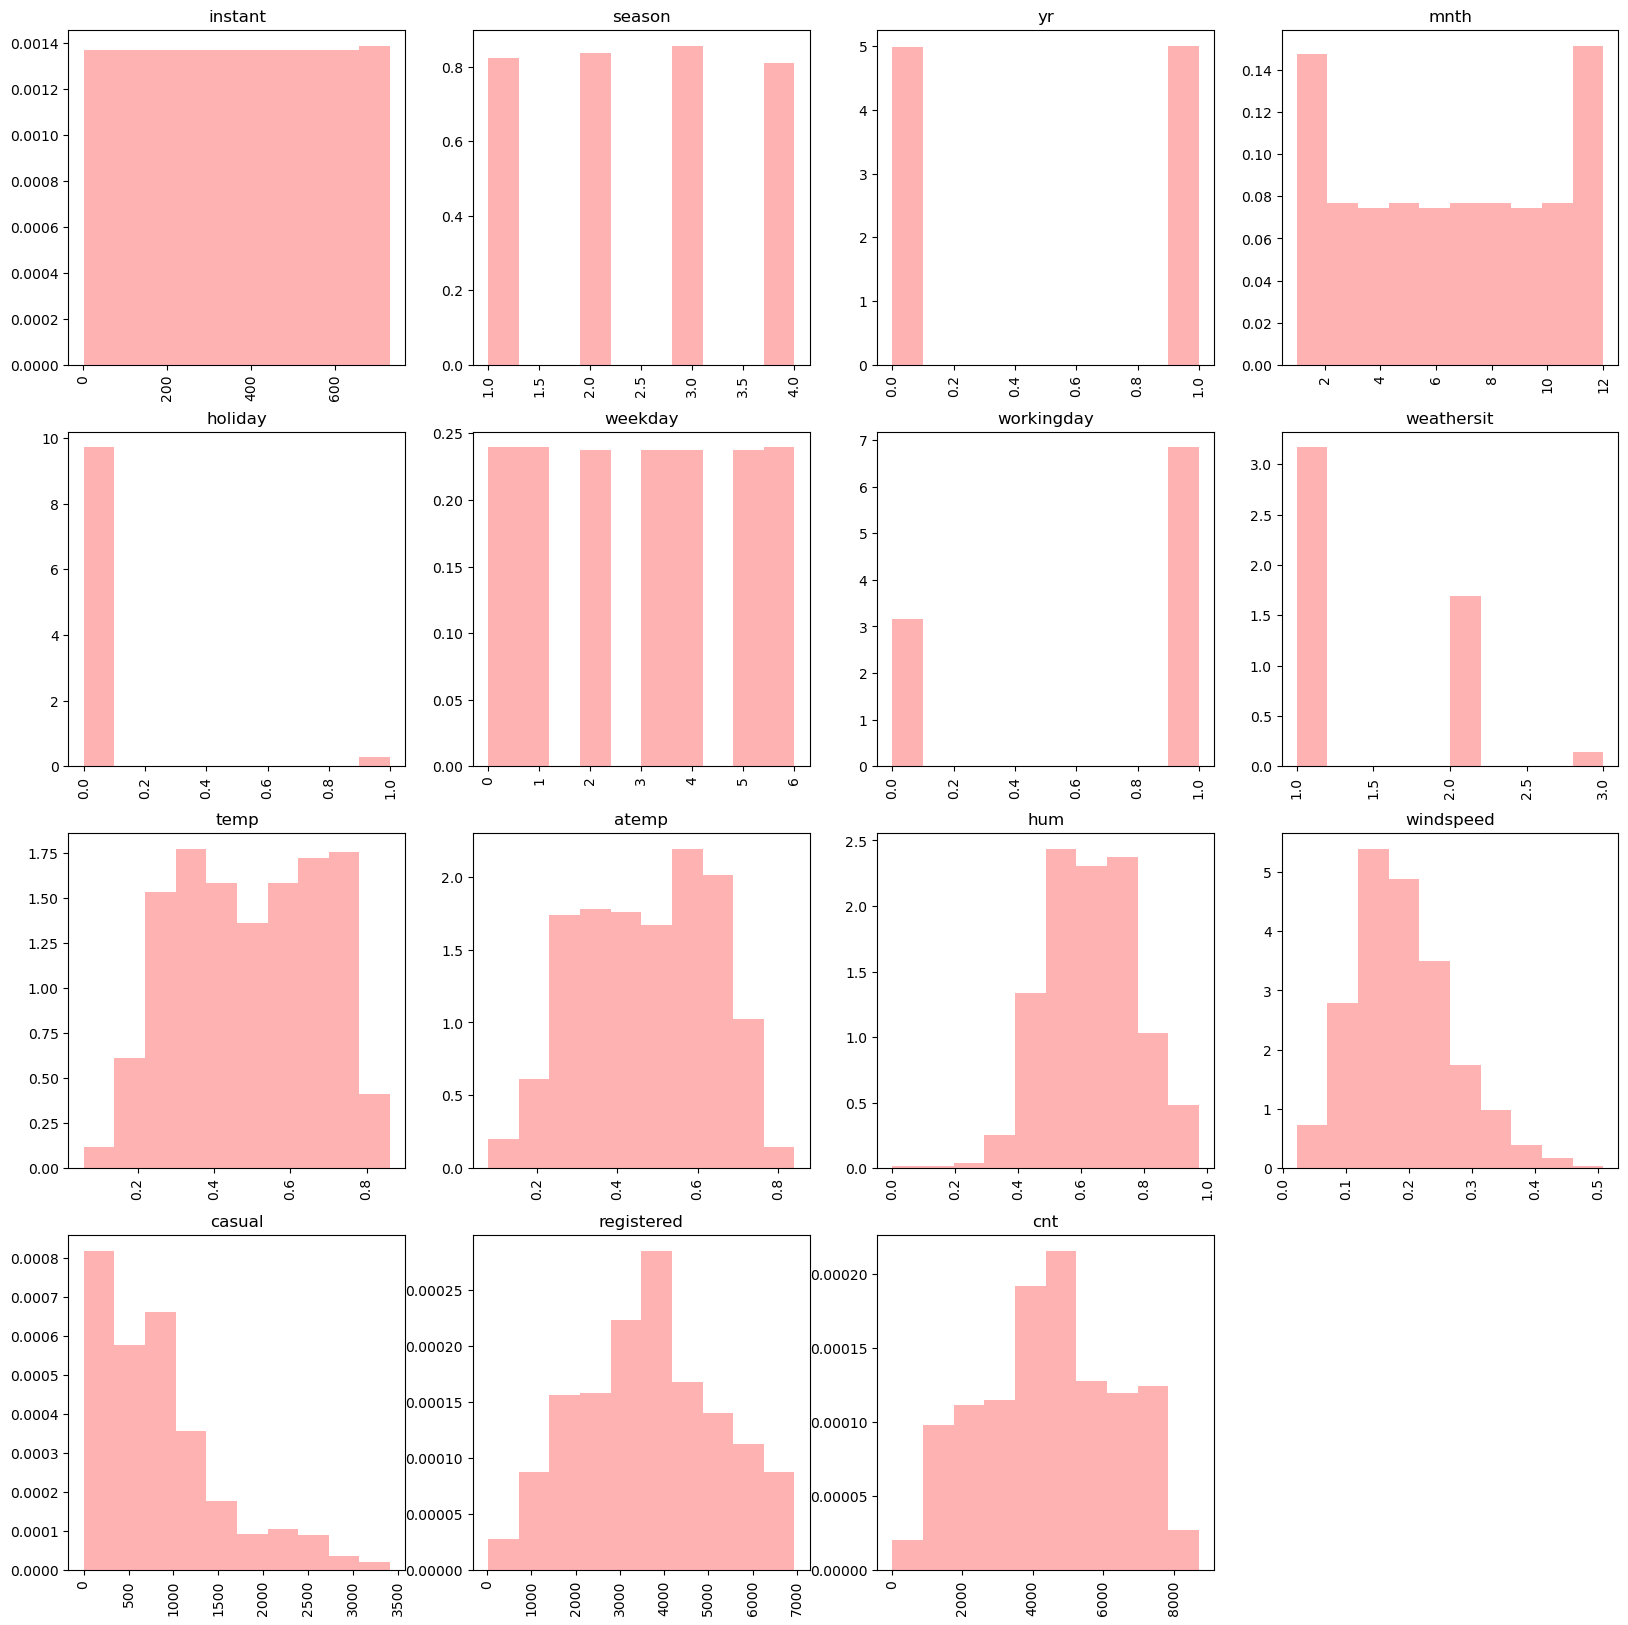

In [69]:
numerical_cols = bike_hire_data.select_dtypes(include=['number'])
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(4, 4, i + 1)
    plt.hist(numerical_cols[col], alpha=0.3, color="r", density=True)
    plt.title(col)
    plt.xticks(rotation="vertical")

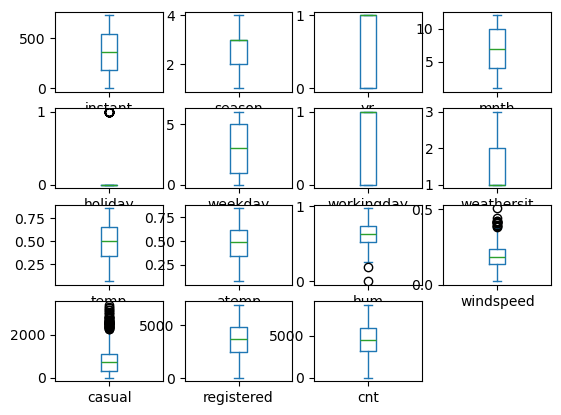

In [61]:
bike_hire_data.plot(kind="box", subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.show()

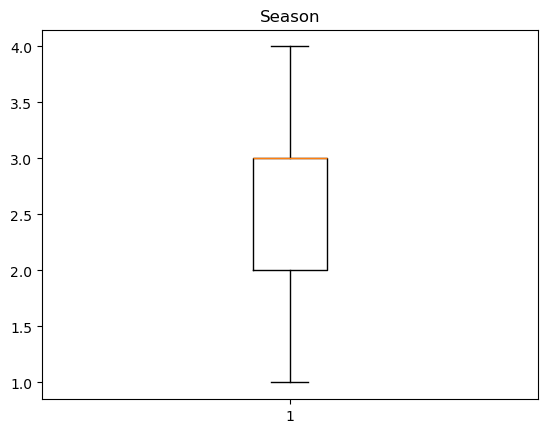

In [70]:
plt.boxplot(bike_hire_data["season"])
plt.title("Season")
plt.show()

[Text(0.5, 0, 'instant'),
 Text(1.5, 0, 'season'),
 Text(2.5, 0, 'yr'),
 Text(3.5, 0, 'mnth'),
 Text(4.5, 0, 'holiday'),
 Text(5.5, 0, 'weekday'),
 Text(6.5, 0, 'workingday'),
 Text(7.5, 0, 'weathersit'),
 Text(8.5, 0, 'temp'),
 Text(9.5, 0, 'atemp'),
 Text(10.5, 0, 'hum'),
 Text(11.5, 0, 'windspeed'),
 Text(12.5, 0, 'casual'),
 Text(13.5, 0, 'registered'),
 Text(14.5, 0, 'cnt')]

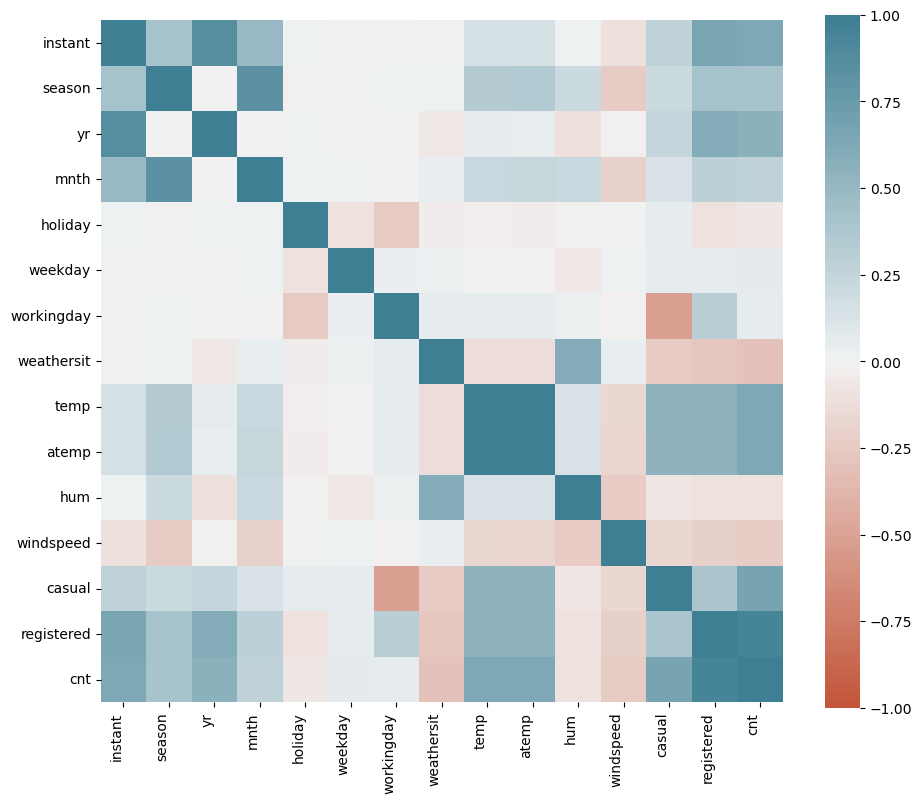

In [75]:
f, ax = plt.subplots(figsize=(11, 9))
corr = numerical_cols.corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment="right")